In [1]:
import pandas as pd

gpb=pd.read_csv('data/gpb.csv',encoding="shift-jis")
gpt=pd.read_csv('data/gp_each10min.csv',encoding="shift-jis")

In [2]:
df_ftv=gpt.loc[(gpt['局'] == 'FTV')]
df_ftv_rates=df_ftv[["datetime","視聴率（世帯）","曜日","timestamp"]]

#save datetime series as datetime formart
df_ftv_rates["datetime"]=pd.to_datetime(df_ftv_rates.datetime)
#set datetime series as index
df_ftv_rates=df_ftv_rates.set_index('datetime')
df_ftv_rates.tail()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,視聴率（世帯）,曜日,timestamp
datetime,,,
2019-12-31 22:10:00,4.7,火,1577830200
2019-12-31 22:20:00,7.0,火,1577830800
2019-12-31 22:30:00,5.9,火,1577831400
2019-12-31 22:40:00,5.0,火,1577832000
2019-12-31 22:50:00,5.9,火,1577832600


In [6]:
df_loc=df_ftv_rates.loc[(df_ftv_rates['曜日'] == '木')]
locs=df_loc.index.indexer_at_time('20:10:00')
ts_loc=df_loc.iloc[locs]
ts_loc.head()

,視聴率（世帯）,曜日,timestamp
datetime,,,
2017-01-05 20:10:00,11.4,木,1483647000
2017-01-12 20:10:00,8.4,木,1484251800
2017-01-19 20:10:00,10.6,木,1484856600
2017-01-26 20:10:00,10.1,木,1485461400
2017-02-02 20:10:00,8.2,木,1486066200


In [7]:
ftv_code=[]
ftv_title=[]

for index,row in ts_loc.iterrows():
    t=row.timestamp
    for a,b,c in zip(gpb.datetimets,gpb.endtimets,gpb["Unnamed: 0"]):
        if t in range(a,b):
            if gpb["局"][c]=="FTV":
                ftv_code.append(gpb["番組分類コード"][c])
                ftv_title.append(gpb["メインタイトル"][c])
            else:
                pass
        else:
            pass
                
ts_loc["番組分類コード"]=ftv_code
ts_loc["メインタイトル"]=ftv_title
ts_loc

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,視聴率（世帯）,曜日,timestamp,番組分類コード,メインタイトル
datetime,,,,,
2017-01-05 20:10:00,11.4,木,1483647000,190,奇跡体験！アンビリバボー新春２時間スペシャル！
2017-01-12 20:10:00,8.4,木,1484251800,190,奇跡体験！アンビリバボー
2017-01-19 20:10:00,10.6,木,1484856600,190,奇跡体験！アンビリバボー
2017-01-26 20:10:00,10.1,木,1485461400,190,奇跡体験！アンビリバボー
2017-02-02 20:10:00,8.2,木,1486066200,190,奇跡体験！アンビリバボー
2017-02-09 20:10:00,9.4,木,1486671000,190,奇跡体験！アンビリバボー
2017-02-16 20:10:00,5.1,木,1487275800,553,四大陸フィギュアスケート選手権２０１７女子ショートプログラム
2017-02-23 20:10:00,9.7,木,1487880600,190,奇跡体験！アンビリバボー
2017-03-02 20:10:00,11.1,木,1488485400,190,奇跡体験！アンビリバボー


In [8]:
import collections
c=collections.Counter(ftv_title)
for k,v in c.most_common(5):
    print(k,v)

奇跡体験！アンビリバボー　　　　　　　　　　　　　　　　　　 93
直撃！シンソウ坂上ＳＰ　　　　　　　　　　　　　　　　　　　 11
奇跡体験！アンビリバボー新春２時間スペシャル！　　　　　　　 1
四大陸フィギュアスケート選手権２０１７女子ショートプログラム 1
さまぁ〜ずＴＶ動物園最強マジかわ映像大連発！ワンちゃんの気持 1


In [13]:
#ttl=ts_loc["メインタイトル"]["2019-08-21 21:10:00"]
#loc2=ts_loc.loc[(ts_loc['メインタイトル'] == ttl)]
#loc2=ts_loc.loc[(ts_loc['メインタイトル'] == ttl)]

loc2=ts_loc[ts_loc["メインタイトル"].str.startswith("奇跡体験！")]
loc2

,視聴率（世帯）,曜日,timestamp,番組分類コード,メインタイトル
datetime,,,,,
2017-01-05 20:10:00,11.4,木,1483647000,190,奇跡体験！アンビリバボー新春２時間スペシャル！
2017-01-12 20:10:00,8.4,木,1484251800,190,奇跡体験！アンビリバボー
2017-01-19 20:10:00,10.6,木,1484856600,190,奇跡体験！アンビリバボー
2017-01-26 20:10:00,10.1,木,1485461400,190,奇跡体験！アンビリバボー
2017-02-02 20:10:00,8.2,木,1486066200,190,奇跡体験！アンビリバボー
2017-02-09 20:10:00,9.4,木,1486671000,190,奇跡体験！アンビリバボー
2017-02-23 20:10:00,9.7,木,1487880600,190,奇跡体験！アンビリバボー
2017-03-02 20:10:00,11.1,木,1488485400,190,奇跡体験！アンビリバボー
2017-03-09 20:10:00,9.1,木,1489090200,190,奇跡体験！アンビリバボー


In [16]:
import numpy as np

loc3=ts_loc["2017-01-11 21:10:00":]

ftv_na=[]

for index,row in loc3.iterrows():
    if row["メインタイトル"].startswith("奇跡体験！"):
        ftv_na.append(row["視聴率（世帯）"])
    else:
        ftv_na.append(np.nan)
loc3["視聴率（修正）"]=ftv_na
loc3=loc3.apply(pd.Series.interpolate)
loc3

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,視聴率（世帯）,曜日,timestamp,番組分類コード,メインタイトル,視聴率（修正）
datetime,,,,,,
2017-01-12 20:10:00,8.4,木,1484251800,190,奇跡体験！アンビリバボー,8.400000
2017-01-19 20:10:00,10.6,木,1484856600,190,奇跡体験！アンビリバボー,10.600000
2017-01-26 20:10:00,10.1,木,1485461400,190,奇跡体験！アンビリバボー,10.100000
2017-02-02 20:10:00,8.2,木,1486066200,190,奇跡体験！アンビリバボー,8.200000
2017-02-09 20:10:00,9.4,木,1486671000,190,奇跡体験！アンビリバボー,9.400000
2017-02-16 20:10:00,5.1,木,1487275800,553,四大陸フィギュアスケート選手権２０１７女子ショートプログラム,9.550000
2017-02-23 20:10:00,9.7,木,1487880600,190,奇跡体験！アンビリバボー,9.700000
2017-03-02 20:10:00,11.1,木,1488485400,190,奇跡体験！アンビリバボー,11.100000
2017-03-09 20:10:00,9.1,木,1489090200,190,奇跡体験！アンビリバボー,9.100000


In [14]:
import numpy as np

loc3=ts_loc["2017-01-11 21:10:00":]

ftv_na=[]

for index,row in loc3.iterrows():
    if row["メインタイトル"]==ttl:
        ftv_na.append(row["視聴率（世帯）"])
    else:
        ftv_na.append(np.nan)
loc3["視聴率（修正）"]=ftv_na
loc3=loc3.apply(pd.Series.interpolate)
loc3

NameError: name 'ttl' is not defined

In [17]:
data=loc3["視聴率（修正）"]
ts=data
print(ts)
len(ts)

datetime
2017-01-12 20:10:00     8.400000
2017-01-19 20:10:00    10.600000
2017-01-26 20:10:00    10.100000
2017-02-02 20:10:00     8.200000
2017-02-09 20:10:00     9.400000
2017-02-16 20:10:00     9.550000
2017-02-23 20:10:00     9.700000
2017-03-02 20:10:00    11.100000
2017-03-09 20:10:00     9.100000
2017-03-16 20:10:00     7.900000
2017-03-23 20:10:00     9.700000
2017-03-30 20:10:00    10.350000
2017-04-06 20:10:00    11.000000
2017-04-13 20:10:00     8.500000
2017-04-20 20:10:00     6.000000
2017-04-27 20:10:00     9.500000
2017-05-04 20:10:00     6.900000
2017-05-11 20:10:00     9.600000
2017-05-18 20:10:00     8.700000
2017-05-25 20:10:00     8.700000
2017-06-01 20:10:00     6.800000
2017-06-08 20:10:00     9.500000
2017-06-15 20:10:00     7.500000
2017-06-22 20:10:00     7.500000
2017-06-29 20:10:00     8.500000
2017-07-06 20:10:00     8.566667
2017-07-13 20:10:00     8.633333
2017-07-20 20:10:00     8.700000
2017-07-27 20:10:00    10.500000
2017-08-03 20:10:00     7.500000
 

155

In [20]:
import numpy as np
from scipy import stats

from statsmodels.tsa.stattools import adfuller

# Dickey-Fuller test 結果と標準偏差、平均のプロット
def test_stationarity(timeseries, window_size=12):
    # Determing rolling statistics
    rolmean = timeseries.rolling(window=window_size,center=False).mean()
    rolstd = timeseries.rolling(window=window_size,center=False).std()

    # Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value',
                                             '#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

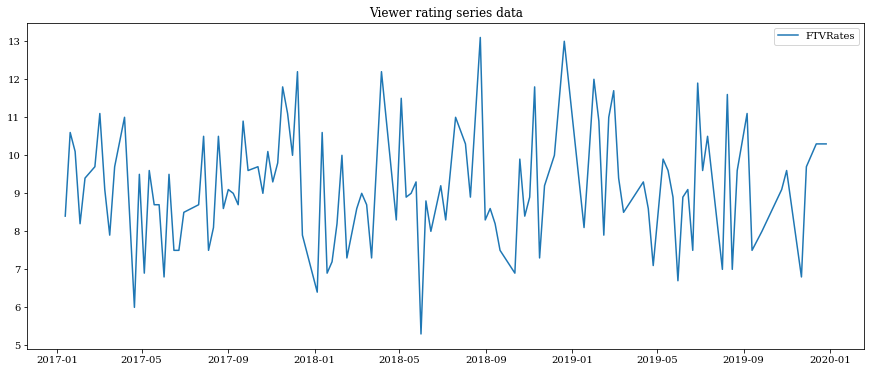

In [45]:
# グラフ描画
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

import matplotlib as mpl
mpl.rcParams['font.family'] = ['serif']

plt.plot(ts, label='FTVRates')
plt.title('Viewer rating series data')
plt.legend(loc='best')

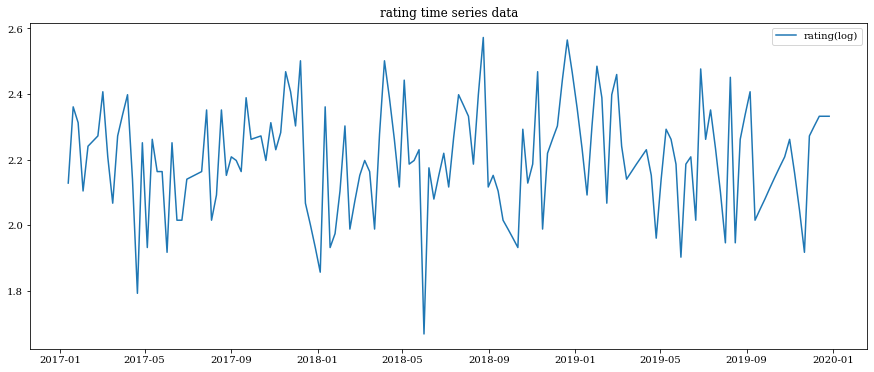

In [46]:
#対数をとって傾向を確認

ts_log = np.log(ts)
plt.plot(ts_log, label='rating(log)')
plt.title('rating time series data')
plt.legend(loc='best')

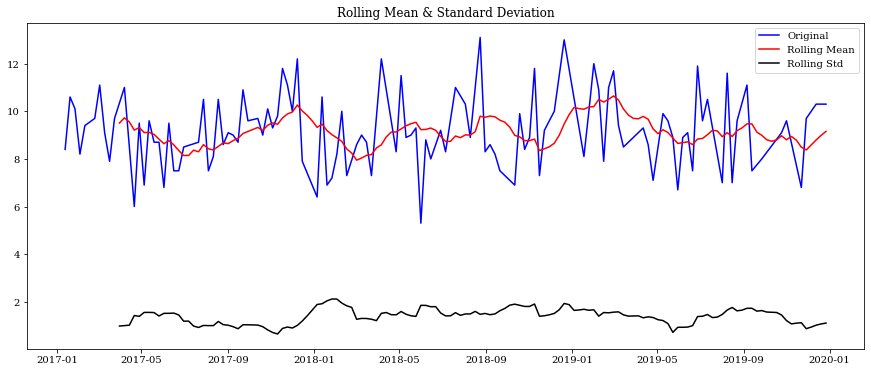

Results of Dickey-Fuller Test:
Test Statistic                 -9.64
p-value                         0.00
#Lags Used                      0.00
Number of Observations Used   154.00
Critical Value (1%)            -3.47
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64


In [47]:
'''
定常性をチェックするための統計的テストの1つ。
ここで、帰無仮説は、ts が非定常であるということ。
テスト結果は、「検定統計量(Test Statistic)」と1,5,10%の信頼水準の「臨界値(Critical Value)」から構成されます。
「検定統計量」が「臨界値」よりも小さい場合は、帰無仮説を棄却して系列が定常状態と判定。

'''

test_stationarity(ts, window_size=12)


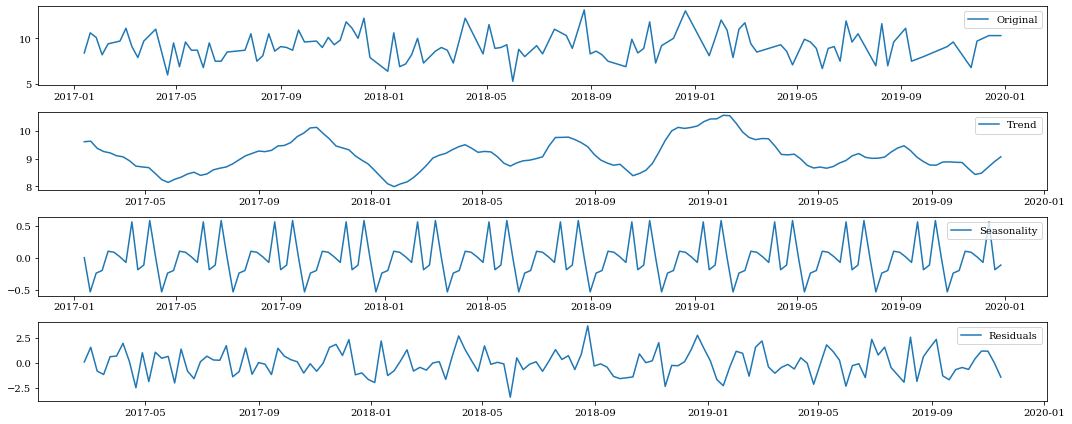

In [48]:

# 傾向(trend)、季節性(seasonal)、残差(residual)に分解してモデル化する。
# https://momonoki2017.blogspot.com/2018/03/python6.html

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts,freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


# オリジナルの時系列データプロット
# 411=グラフ4行1列の1番目の位置（一番上）
plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
 
# trend のプロット
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
 
# seasonal のプロット
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
 
# residual のプロット
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

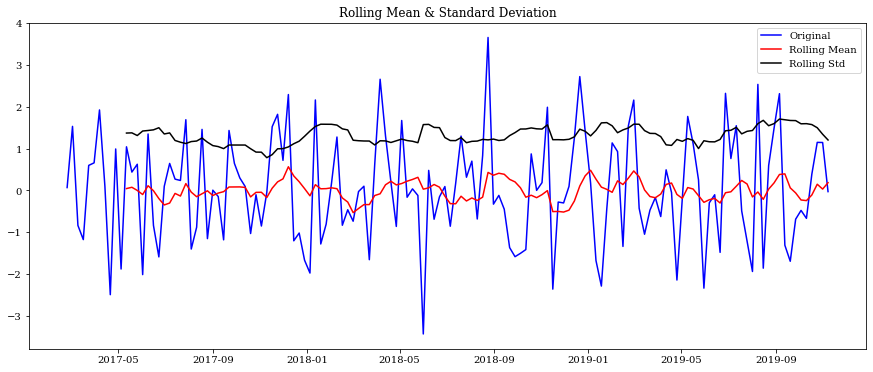

Results of Dickey-Fuller Test:
Test Statistic                 -6.08
p-value                         0.00
#Lags Used                     13.00
Number of Observations Used   128.00
Critical Value (1%)            -3.48
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64


In [49]:
'''
定常性をチェックするための統計的テストの1つ。
ここで、帰無仮説は、ts が非定常であるということ。
テスト結果は、「検定統計量(Test Statistic)」と1,5,10%の信頼水準の「臨界値(Critical Value)」から構成されます。
「検定統計量」が「臨界値」よりも小さい場合は、帰無仮説を棄却して系列が定常状態と判定。

'''

test_stationarity(residual[6:-7], window_size=12)


In [26]:
# 総当たりで、AICが最小となるSARIMAの次数を探す
max_p = 3
max_d = 1
max_q = 3
max_sp = 1
max_sd = 1
max_sq = 1

pattern = max_p*(max_q + 1)*(max_d + 1)*(max_sp + 1)*(max_sq + 1)*(max_sd + 1)

#maxlag should be < nobs always OCCUR in python3, how to fix it?
#https://github.com/statsmodels/statsmodels/issues/4465
#SARIMAX (p,d,q)x(P,D,Q,s)
#d + D*s + max(3*q + 1, 3*Q*s + 1, p, P*s) + 1 observations

s=12
atleast=max_d+max_sd*s+max(3*max_q+1,3*max_sq*s+1,max_p,max_sp,s)+s

modelSelection = pd.DataFrame(index=range(pattern), columns=["model", "aic"])
print("pattern:",pattern)
print("atleast:",atleast)

pattern: 192
atleast: 62


In [27]:

import statsmodels.api as sm

# 自動SARIMA選択
num = 0

for p in range(1, max_p + 1):
    for d in range(0, max_d + 1):
        for q in range(0, max_q + 1):
            for sp in range(0, max_sp + 1):
                for sd in range(0, max_sd + 1):
                    for sq in range(0, max_sq + 1):
                        sarima = sm.tsa.SARIMAX(
                            ts, order=(p,d,q), 
                            seasonal_order=(sp,sd,sq,12), 
                            enforce_stationarity = False, 
                            enforce_invertibility = False
                        ).fit()
                        modelSelection.iloc[num]["model"] = "order=(" + str(p) + ","+ str(d) + ","+ str(q) + "), season=("+ str(sp) + ","+ str(sd) + "," + str(sq) + ")"
                        modelSelection.iloc[num]["aic"] = sarima.aic
                        num = num + 1

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequenc

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  % freq, ValueWarn

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  % freq, ValueWarn

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  % freq, ValueWarn

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  % fre

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  % freq, ValueWarn

In [28]:
# モデルごとの結果確認
print(modelSelection)
# AIC最小モデル
print(modelSelection[modelSelection.aic == min(modelSelection.aic)])

                             model      aic
0    order=(1,0,0), season=(0,0,0)  621.274
1    order=(1,0,0), season=(0,0,1)  579.365
2    order=(1,0,0), season=(0,1,0)  634.793
3    order=(1,0,0), season=(0,1,1)  490.255
4    order=(1,0,0), season=(1,0,0)  578.182
5    order=(1,0,0), season=(1,0,1)  546.525
6    order=(1,0,0), season=(1,1,0)   507.38
7    order=(1,0,0), season=(1,1,1)  492.427
8    order=(1,0,1), season=(0,0,0)  563.414
9    order=(1,0,1), season=(0,0,1)  519.309
10   order=(1,0,1), season=(0,1,0)  629.786
11   order=(1,0,1), season=(0,1,1)  489.122
12   order=(1,0,1), season=(1,0,0)  520.957
13   order=(1,0,1), season=(1,0,1)  542.831
14   order=(1,0,1), season=(1,1,0)  509.238
15   order=(1,0,1), season=(1,1,1)  490.567
16   order=(1,0,2), season=(0,0,0)  552.397
17   order=(1,0,2), season=(0,0,1)   513.34
18   order=(1,0,2), season=(0,1,0)  625.038
19   order=(1,0,2), season=(0,1,1)  488.671
20   order=(1,0,2), season=(1,0,0)    517.6
21   order=(1,0,2), season=(1,0,

In [29]:
import statsmodels.api as sm

p=3
d=0
q=3
sp=0
sd=1
sq=1

sarima = sm.tsa.SARIMAX(
    ts, order=(p,d,q), 
    seasonal_order=(sp,sd,sq,12), 
    enforce_stationarity = False, 
    enforce_invertibility = False
).fit()
# 結果確認
print(sarima.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                            視聴率（修正）   No. Observations:                  155
Model:             SARIMAX(3, 0, 3)x(0, 1, 1, 12)   Log Likelihood                -231.583
Date:                            Sun, 22 Mar 2020   AIC                            479.166
Time:                                    22:19:33   BIC                            501.919
Sample:                                01-12-2017   HQIC                           488.410
                                     - 12-26-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1087      0.307     -3.607      0.000      -1.711      -0.506
ar.L2         -0.5239      0.442   

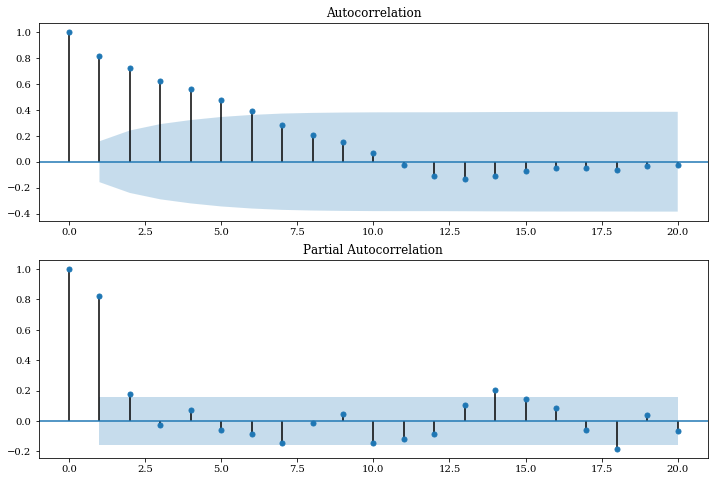

In [30]:
# 残差のチェック
residSARIMA = sarima.resid
fig = plt.figure(figsize=(12,8))

# 自己相関
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residSARIMA, lags=20, ax=ax1)

# 偏自己相関
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residSARIMA, lags=20, ax=ax2)

# 残差の自己相関については、ほぼ問題なくなったことを確認

In [32]:
# 予測
ts_pred = sarima.predict('2019-09-05', '2020-03-26')

predict_dy = sarima.get_prediction(start ='2019-09-05',end='2020-03-26')
predict_dy_ci = predict_dy.conf_int(alpha=0.05) # defalut alpah=0.05 :returns a 95% confidence interval


2019-10-10 20:10:00    9.29
2019-10-17 20:10:00    8.70
2019-10-24 20:10:00    8.64
2019-10-31 20:10:00    8.85
2019-11-07 20:10:00    9.38
2019-11-14 20:10:00    9.18
2019-11-21 20:10:00    8.56
2019-11-28 20:10:00    8.82
2019-12-05 20:10:00    8.79
2019-12-12 20:10:00   10.15
2019-12-19 20:10:00    9.29
2019-12-26 20:10:00    9.16
2020-01-02 20:10:00   10.39
2020-01-09 20:10:00    9.18
2020-01-16 20:10:00    8.48
2020-01-23 20:10:00    9.33
2020-01-30 20:10:00    8.68
2020-02-06 20:10:00    9.21
2020-02-13 20:10:00    9.13
2020-02-20 20:10:00    9.11
2020-02-27 20:10:00    9.25
2020-03-05 20:10:00    9.70
2020-03-12 20:10:00    9.00
2020-03-19 20:10:00    9.37
2020-03-26 20:10:00    9.56
Freq: W-THU, dtype: float64


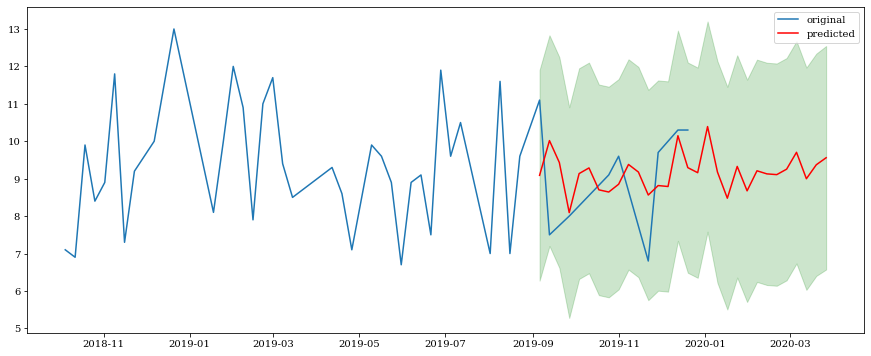

In [50]:
# 実データと予測結果の図示
plt.plot(data[-65:-1], label='original')
plt.plot(ts_pred, label='predicted', color='red')
plt.legend(loc='best')
plt.fill_between(predict_dy_ci.index, predict_dy_ci.iloc[:, 0], predict_dy_ci.iloc[:, 1], color='g', alpha=0.2)

print(ts_pred[-25:])

In [34]:
p=ts_pred[-31:-17]
t=data[-17:-4]

In [38]:
g=abs(t-p)
r=g/p*100

In [39]:
pd.options.display.float_format = '{:.2f}'.format

df2=pd.DataFrame({"予測":p, "実際":t,"誤差":g,"誤差率（%）":r})
df2.index.name = "日付"
df2

,予測,実際,誤差,誤差率（%）
日付,,,,
2019-09-05 20:10:00,9.09,11.10,2.01,22.12
2019-09-12 20:10:00,10.02,7.50,2.52,25.13
2019-09-19 20:10:00,9.43,7.75,1.68,17.83
2019-09-26 20:10:00,8.09,8.00,0.09,1.14
2019-10-03 20:10:00,9.14,8.28,0.86,9.42
2019-10-10 20:10:00,9.29,8.55,0.74,7.94
2019-10-17 20:10:00,8.70,8.82,0.12,1.41
2019-10-24 20:10:00,8.64,9.10,0.46,5.28
2019-10-31 20:10:00,8.85,9.60,0.75,8.46


In [40]:
#RMSE
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(t, p))

1.2941362434762413

In [41]:
#MAPE

import numpy as np
np.mean(np.abs((p - t) / t)) * 100



13.05600349089474

In [51]:
#外れ原因調査

t=loc3["timestamp"]["2019-09-12 20:10:00"]
result=gpb.loc[(gpb.datetimets<t)&(gpb.endtimets>t)]
result.drop(columns=["Unnamed: 0","年","月","日","開始時","開始分","datetimets","endtimets"])


,datetime,曜日,局,放送分数,番組分類コード,新番組コード,占拠率（世帯）,メインタイトル,サブタイトル,endtime
52635,2019-09-12 19:56:00,木,NTV,58,190,,11.80,ぐるぐるナインティナイン,,2019-09-12 20:54:00
52641,2019-09-12 20:00:00,木,TBS,117,190,,8.40,ニンゲン観察バラエティモニタリング,,2019-09-12 21:57:00
52646,2019-09-12 19:57:00,木,FTV,63,190,,8.10,奇跡体験！アンビリバボー,,2019-09-12 21:00:00
52650,2019-09-12 19:00:00,木,ANB,114,190,,9.70,日本人の３割しか知らないことくりぃむしちゅーのハナタカ！優越,,2019-09-12 20:54:00
52656,2019-09-12 19:00:00,木,TX,109,030,,4.70,太川蛭子の旅バラスペシャル,,2019-09-12 20:49:00
52667,2019-09-12 19:57:00,木,NHK1,45,190,,6.80,ネーミングバラエティー日本人のおなまえっ！,,2019-09-12 20:42:00
52680,2019-09-12 20:00:00,木,NHK2,30,072,,0.60,バリバラ,,2019-09-12 20:30:00
